In [1]:
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

import num_gan as ng
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\pinak\Documents\GitHub\GAN


In [10]:
data = np.genfromtxt('..\data\l63_attractor_10000.csv', delimiter=',')
dataset = tf.data.Dataset.from_tensor_slices(data).batch(1000)

In [3]:
gan = ng.NumGAN(16, 3, 3, 2, name='attractor_sampler')
gan.load()

In [9]:
gan.train(dataset, 10000)

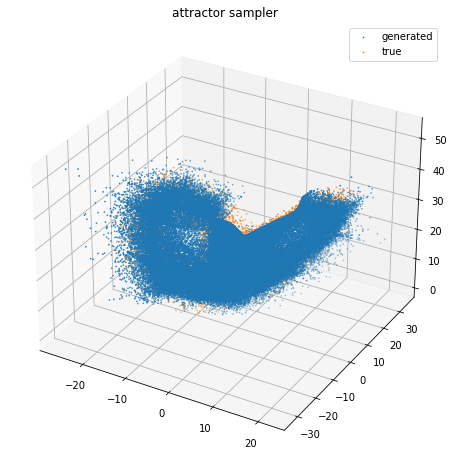

In [8]:
n = 100000
noise = tf.random.normal([n, 2])
gen = gan.generator(noise, training=False)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gen[:, 0], gen[:, 1], gen[:, 2], label='generated', s=0.5)
ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true', s=0.5)
ax.set_title('attractor sampler')
plt.legend()
plt.show()

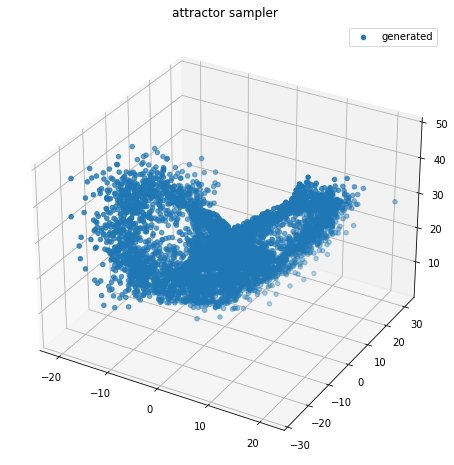

In [6]:
gan2 = ng.NumGAN(16, 3, 3, 2, name='attractor_sampler')
gan2.load()
n = 6000
noise = tf.random.normal([n, 2])
gen = gan2.generator(noise, training=False)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gen[:, 0], gen[:, 1], gen[:, 2], label='generated')
#ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true')
ax.set_title('attractor sampler')
plt.legend()
plt.show()